In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#verisetini yükleme işlemi
data= sns.load_dataset("titanic")
print(data.shape)


(891, 15)


In [25]:
data.columns # verideki sütunların görüntülenmesi

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'alive', 'alone'],
      dtype='object')

In [27]:
data.head() #verinin içeriğinin görüntülenmesi

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
print(data.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [33]:
#yaşayan ve yaşamayanların bilgisinin farklı bir şekilde ifadesi
data["survive_or_not"] = data["survived"].replace(
     {1: "yaşıyor",
      0: "ölü"})
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone survive_or_not  
0    man        True  NaN  Southampton    no  False            ölü  
1  woman       False    C    Cherbourg   yes  False        yaşıyor  
2  woman       False  NaN  Southampton   yes   True        yaşıyor  
3  woman       False    C  Southampton   yes  False        yaşıyor  
4    man        True  NaN  Southampton    no   True            ölü  


In [6]:
print(data.isnull().sum()) #boş olan sütun sayısının toplamları

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [66]:
from sklearn.impute import SimpleImputer
# Yaş sütunundaki eksik verileri medyan ile dolduruluyor
age_imputer=SimpleImputer(strategy='median')
#age_imputer=SimpleImputer(strategy='mean')
data['age']=age_imputer.fit_transform(data[['age']])

embarked_imputer = SimpleImputer(strategy='most_frequent')
data['embarked'] = embarked_imputer.fit_transform(data[['embarked']]).ravel() 




In [57]:
# Geçerli 'deck' kategorileri için liste
cat = ['C', 'E', 'G', 'D', 'A', 'B', 'F']
#eksik olan veriler yerine bilinmiyor yazısı eklendi
new_deck = []
for deck in data["deck"]:
    if deck in cat:
       new_deck.append(deck)
    else:
       new_deck.append("bilinmiyor")
data["deck"] = new_deck
data_deck = data.loc[data["deck"] != "bilinmiyor"]

print(data.isnull().sum())
#print(data.describe(include='all'))
print(data.head())


survived            0
pclass              0
sex                 0
age               177
sibsp               0
parch               0
fare                0
embarked            2
class               0
who                 0
adult_male          0
deck                0
embark_town         2
alive               0
alone               0
survive_or_not      0
dtype: int64
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male        deck  embark_town alive  alone survive_or_not  
0    man        True  bilinmiyor  Southampton    no  False            ölü  
1  woman       False      

In [60]:
%pip install category_encoders

^C
Note: you may need to restart the kernel to use updated packages.


In [22]:
# 'embarked' sütunundaki kategorik verileri OneHotEncoder ile sayısal forma dönüştürme
import category_encoders as ce
encoder = ce.OneHotEncoder(cols=['embarked'])
data_encoded = encoder.fit_transform(data)

print(data_encoded.head())   

   survived  pclass     sex   age  sibsp  parch     fare  embarked_1  \
0         0       3    male  22.0      1      0   7.2500           1   
1         1       1  female  38.0      1      0  71.2833           0   
2         1       3  female  26.0      0      0   7.9250           1   
3         1       1  female  35.0      1      0  53.1000           1   
4         0       3    male  35.0      0      0   8.0500           1   

   embarked_2  embarked_3  class    who  adult_male alive  alone  
0           0           0  Third    man        True    no  False  
1           1           0  First  woman       False   yes  False  
2           0           0  Third  woman       False   yes   True  
3           0           0  First  woman       False   yes  False  
4           0           0  Third    man        True    no   True  


In [30]:
# 'who' sütunundaki değerlerin sayısını bulma
data.who.value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

<Axes: xlabel='who', ylabel='count'>

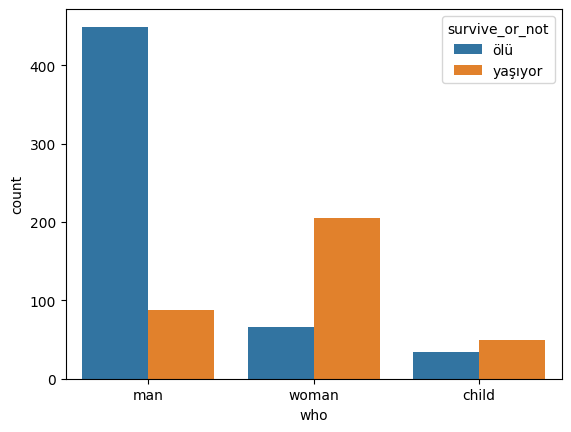

In [34]:
# 'who' sütununa göre 'survive_or_not' değişkeninin dağılımını görselleştirme
sns.countplot(x="who", hue="survive_or_not", data=data)

In [36]:
# 'who' sütununa göre 'survive_or_not' değişkeninin normalize edilmiş oranlarını gruplandırarak gösterme
data.groupby("who")["survive_or_not"].value_counts(normalize=True)

who    survive_or_not
child  yaşıyor           0.590361
       ölü               0.409639
man    ölü               0.836127
       yaşıyor           0.163873
woman  yaşıyor           0.756458
       ölü               0.243542
Name: proportion, dtype: float64

In [35]:

data[data["who"]=="woman"]["survive_or_not"].value_counts(normalize=True)

survive_or_not
yaşıyor    0.756458
ölü        0.243542
Name: proportion, dtype: float64

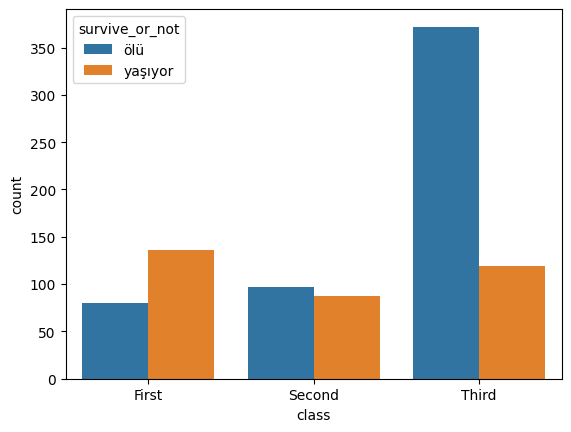

In [40]:
# 'class' ve 'survive_or_not' değişkenlerinin dağılımını içeren bir countplot oluşturma
cx=sns.countplot(x="class", hue="survive_or_not", data=data)

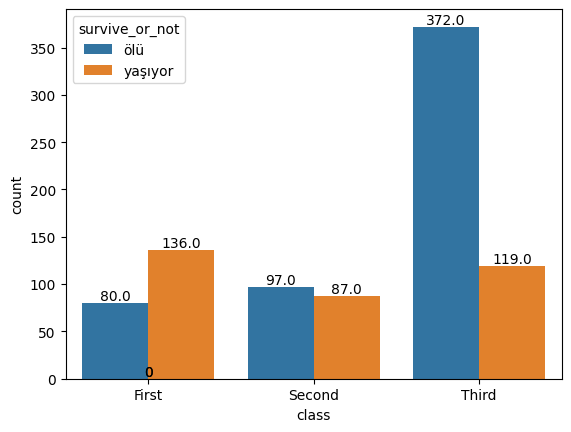

In [43]:

cx=sns.countplot(x="class", hue="survive_or_not", data=data)

#grafik için text yazdırma
for p in cx.patches:
    height = p.get_height() 
    cx.text(x = p.get_x()+(p.get_width()/2), 
    y = height+3,
    s = '{0}'.format(height), 
    ha = 'center') 


C:\Users\user\AppData\Local\Temp\ipykernel_16632\516940667.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  fx = sns.barplot(x="class", y="fare", data=data, ci = 0)


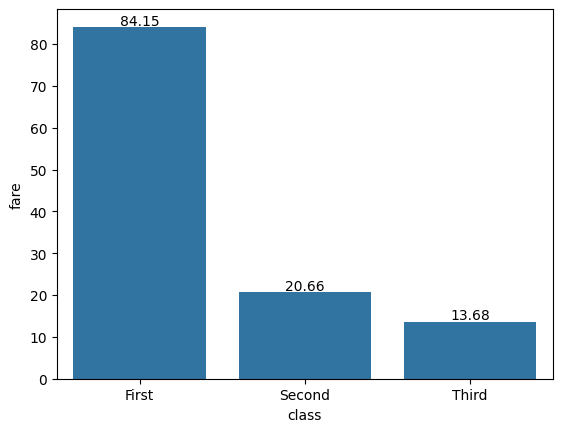

In [44]:
fx = sns.barplot(x="class", y="fare", data=data, ci = 0)
for p in fx.patches:
    height = p.get_height() 
    fx.text(x = p.get_x()+(p.get_width()/2),
    y = height+0.5,
    s = '{:.2f}'.format(height),
    ha = 'center')

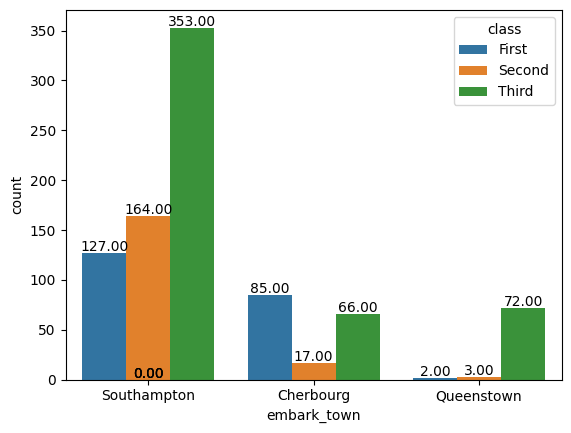

In [45]:
ex = sns.countplot(x="embark_town", hue="class", data=data)
for p in ex.patches:
    height = p.get_height() 
    ex.text(x = p.get_x()+(p.get_width()/2),
    y = height+2,
    s = '{:.2f}'.format(height),
    ha = 'center')

C:\Users\user\AppData\Local\Temp\ipykernel_16632\825667136.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 0)` for the same effect.

  ax = sns.barplot(x="class", y="age", data=data, ci = 0)


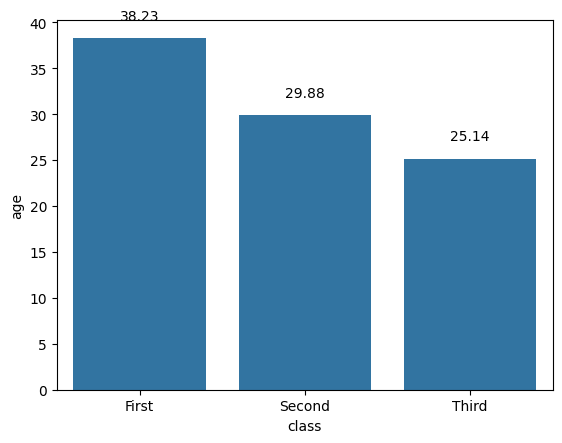

In [46]:
ax = sns.barplot(x="class", y="age", data=data, ci = 0)
for p in ax.patches:
    height = p.get_height() 
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+2,
    s = '{:.2f}'.format(height),
    ha = 'center')

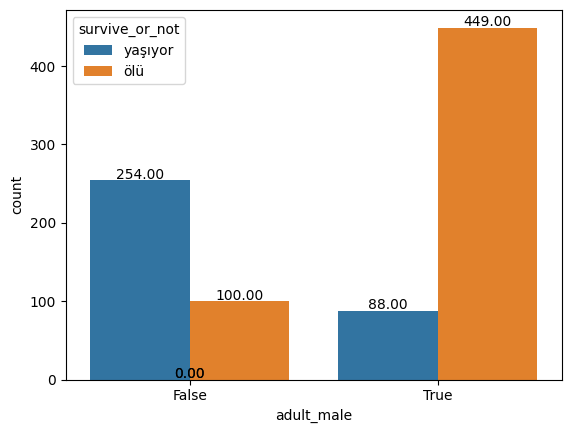

In [47]:
mx = sns.countplot(x="adult_male", hue="survive_or_not", data=data)
for p in mx.patches:
    height = p.get_height() 
    mx.text(x = p.get_x()+(p.get_width()/2),
    y = height+2,
    s = '{:.2f}'.format(height),
    ha = 'center')

In [48]:
data_adult_male = data.loc[data.adult_male == True]

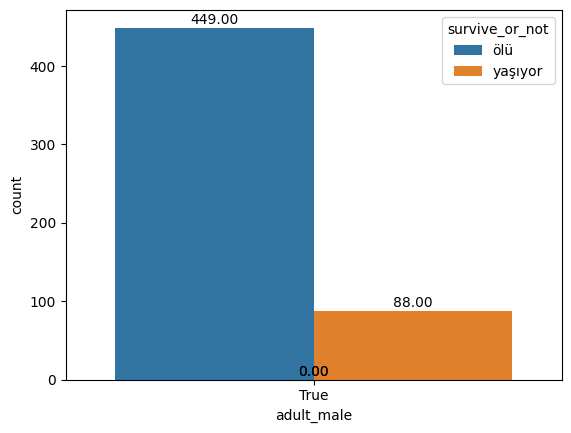

In [49]:
mx = sns.countplot(x="adult_male", hue="survive_or_not", data=data_adult_male)
for p in mx.patches:
    height = p.get_height() 
    mx.text(x = p.get_x()+(p.get_width()/2),
    y = height+4,
    s = '{:.2f}'.format(height),
    ha = 'center')

In [59]:
# Yaş ve ücret sütunlarını standartlaştırmak için StandardScaler kullanma
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['age', 'fare']] = scaler.fit_transform(data[['age', 'fare']])

print(data.head())

   survived  pclass     sex       age  sibsp  parch      fare embarked  class  \
0         0       3    male -0.530377      1      0 -0.502445        S  Third   
1         1       1  female  0.571831      1      0  0.786845        C  First   
2         1       3  female -0.254825      0      0 -0.488854        S  Third   
3         1       1  female  0.365167      1      0  0.420730        S  First   
4         0       3    male  0.365167      0      0 -0.486337        S  Third   

     who  adult_male        deck  embark_town alive  alone survive_or_not  
0    man        True  bilinmiyor  Southampton    no  False            ölü  
1  woman       False           C    Cherbourg   yes  False        yaşıyor  
2  woman       False  bilinmiyor  Southampton   yes   True        yaşıyor  
3  woman       False           C  Southampton   yes  False        yaşıyor  
4    man        True  bilinmiyor  Southampton    no   True            ölü  


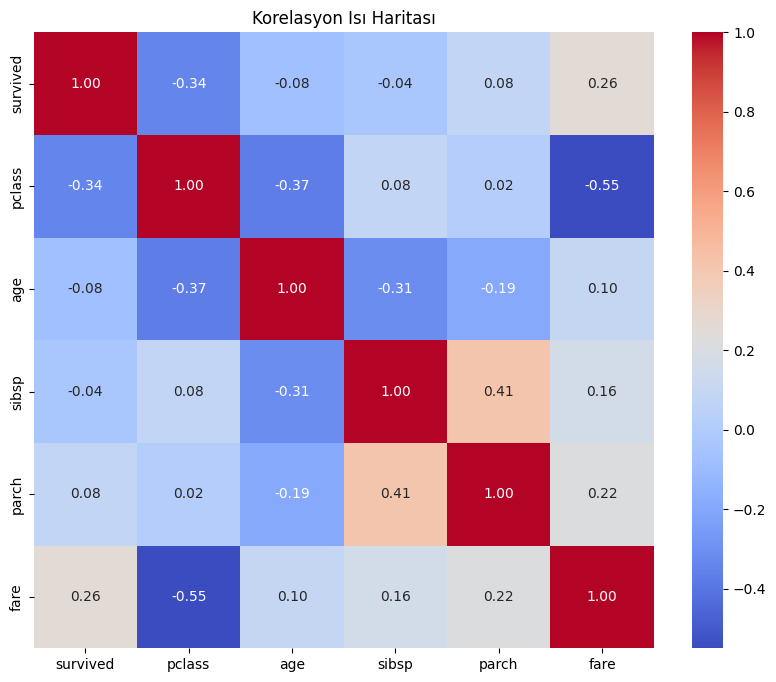

In [65]:
numeric_data = data.select_dtypes(include=[np.number])

# Korelasyon Isı Haritası
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Isı Haritası")
plt.show()